# Deep Neural Network for MNIST Classification

#### Import the relevant packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#### Fetch Data

In [2]:
# get data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# check rawdata
print('train data\t', x_train.shape)
print('test data\t', x_test.shape)

train data	 (60000, 28, 28)
test data	 (10000, 28, 28)


#### Inspect Data

In [4]:
# check one sample sample
s = x_train[0]
print('shape:',s.shape)
print('min value:',np.min(s))
print('max value:',np.max(s))

shape: (28, 28)
min value: 0
max value: 255


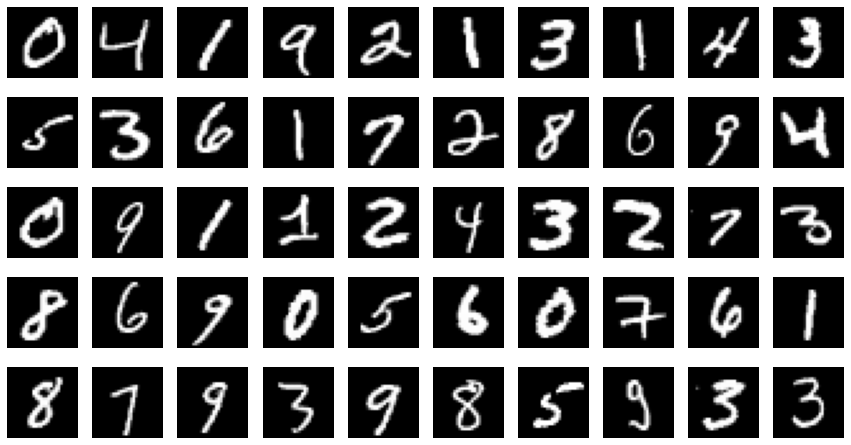

In [5]:
# print some samples for inspection
fig=plt.figure(figsize=(15, 8))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

# Data Preparation

In [6]:
# Feature Normalization 
x_train = x_train.astype('float32'); x_train /= 255
x_test = x_test.astype('float32'); x_test /= 255

In [7]:
# Convert labels to One Hot Encoded
num_digits = 10
y_train = tf.keras.utils.to_categorical(y_train, num_digits)
y_test = tf.keras.utils.to_categorical(y_test, num_digits)

# Train Model

In [8]:
# compare results
df = pd.DataFrame()
df['Label'] = np.argmax(y_test, axis=-1)

#### Model 1

In [9]:
# Input Parameters
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

lossf = tf.nn.softmax_cross_entropy_with_logits
model.compile(optimizer='adam', loss=lossf, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5841 - accuracy: 0.8794
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5246 - accuracy: 0.9366
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5162 - accuracy: 0.9447
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5182 - accuracy: 0.9427
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5163 - accuracy: 0.9448


In [10]:
# evaluate accuracy
df['Model1'] = np.argmax(model.predict(x_test), axis=-1)
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.5171 - accuracy: 0.9442


#### Model 2

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
lossf = tf.nn.softmax_cross_entropy_with_logits
model.compile(optimizer='adam', loss=lossf, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 992us/step - loss: 1.5630 - accuracy: 0.9100
Epoch 2/5
1875/1875 [==============================] - 2s 961us/step - loss: 1.5109 - accuracy: 0.9523
Epoch 3/5
1875/1875 [==============================] - 2s 957us/step - loss: 1.5004 - accuracy: 0.9622
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4941 - accuracy: 0.9680
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4893 - accuracy: 0.9725


In [12]:
df['Model2'] = np.argmax(model.predict(x_test), axis=-1)
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.4967 - accuracy: 0.9654


# Predictions

In [13]:
# preview some predictions
df.head()

,Label,Model1,Model2
0,7,7,7
1,2,2,2
2,1,1,1
3,0,0,0
4,4,4,4


In [14]:
# preview where predictions were difficult
hard_to_predict = df[df.apply(lambda x: min(x) != max(x), 1)]
hard_to_predict.head()

,Label,Model1,Model2
20,9,7,9
33,4,4,0
104,9,9,5
149,2,4,2
151,9,8,8


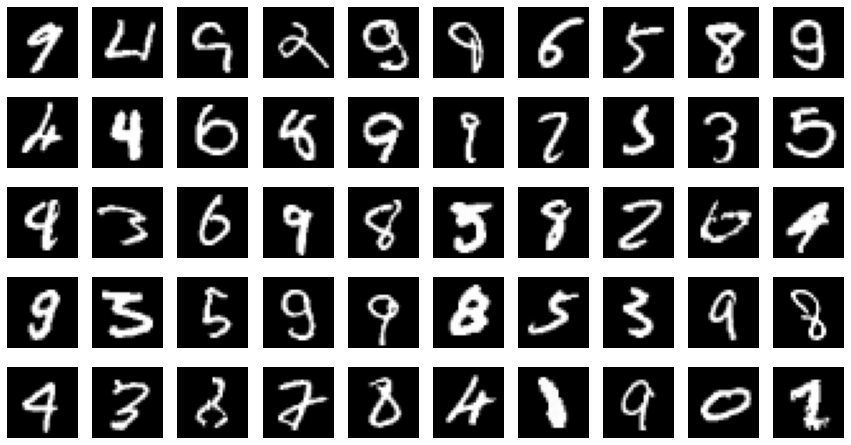

In [15]:
# print some samples for inspection
difficult_samples = hard_to_predict.index
fig=plt.figure(figsize=(15, 8))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    item = difficult_samples[i-1]
    img = x_test[item]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()